# Lab 4 - 20/10

Link github: https://github.com/ilariavascotto/UL_2023_fall

In [8]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import myfunctions as f

## Ex 1

In [9]:
data = pd.read_csv('Datasets/data_kPCA_2023.txt', sep = ' ', header = None)
labels = pd.read_csv('Datasets/labels_kPCA_2023.txt', sep = ' ', header = None)

In [10]:
# Data normalization
new_data = f.normalize_data(data)

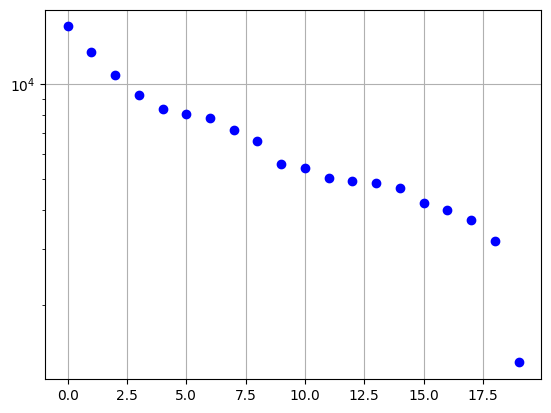

In [11]:
# Eigenvalues spectrum
cov = np.dot(new_data.T, new_data)
eigenvalues = np.linalg.eigh(cov)[0]
eigenvectors = np.linalg.eigh(cov)[1]
plt.semilogy(sorted(eigenvalues, reverse=True), 'bo')
plt.grid()

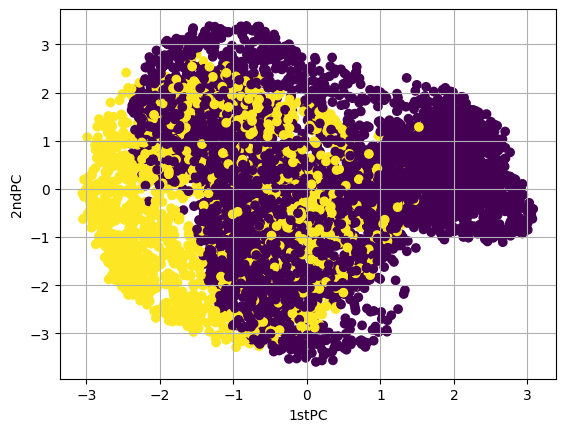

In [12]:
pca_data = f.pca(new_data, 2)
plt.scatter(pca_data[:,0], pca_data[:,1], c=labels)
plt.xlabel("1stPC")
plt.ylabel("2ndPC")
plt.grid()

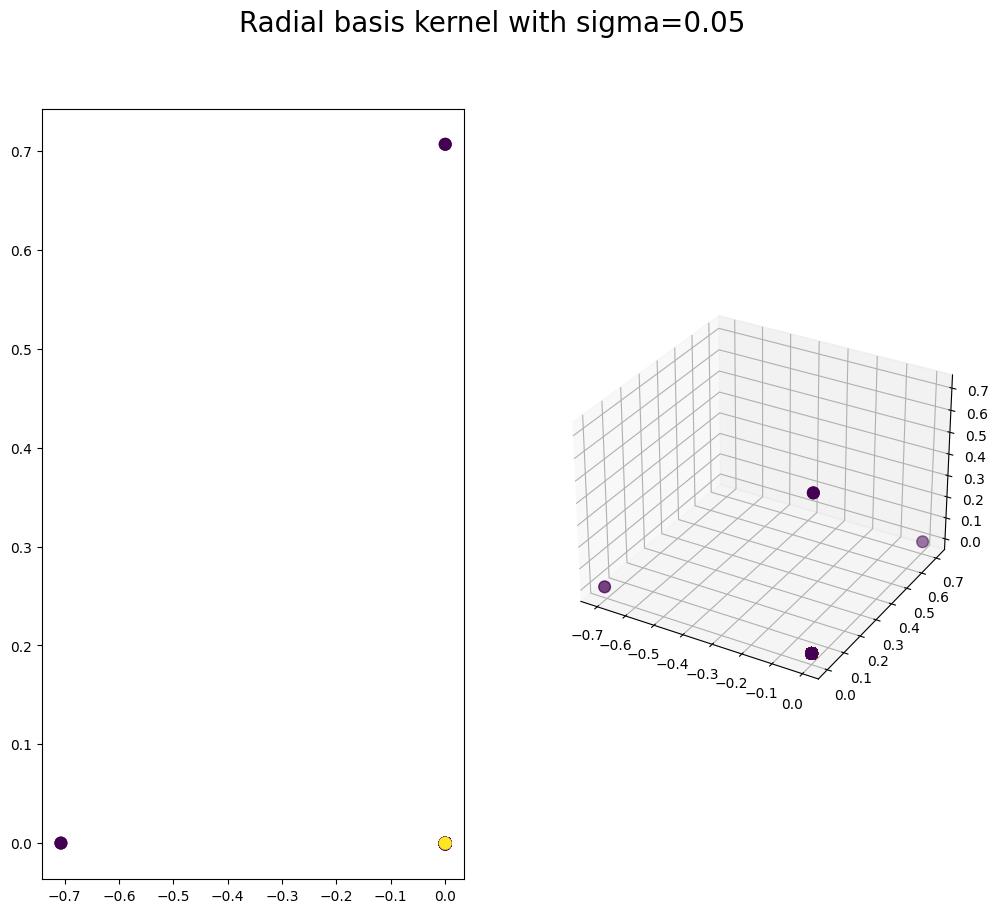

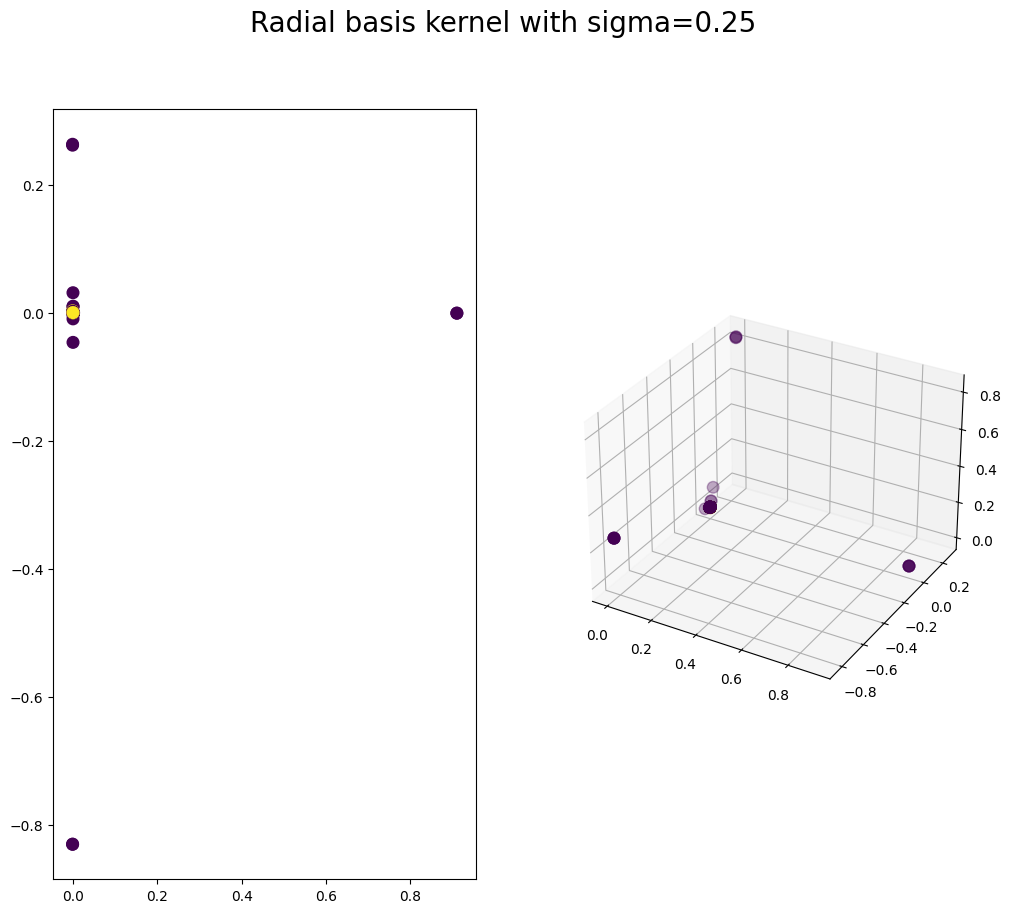

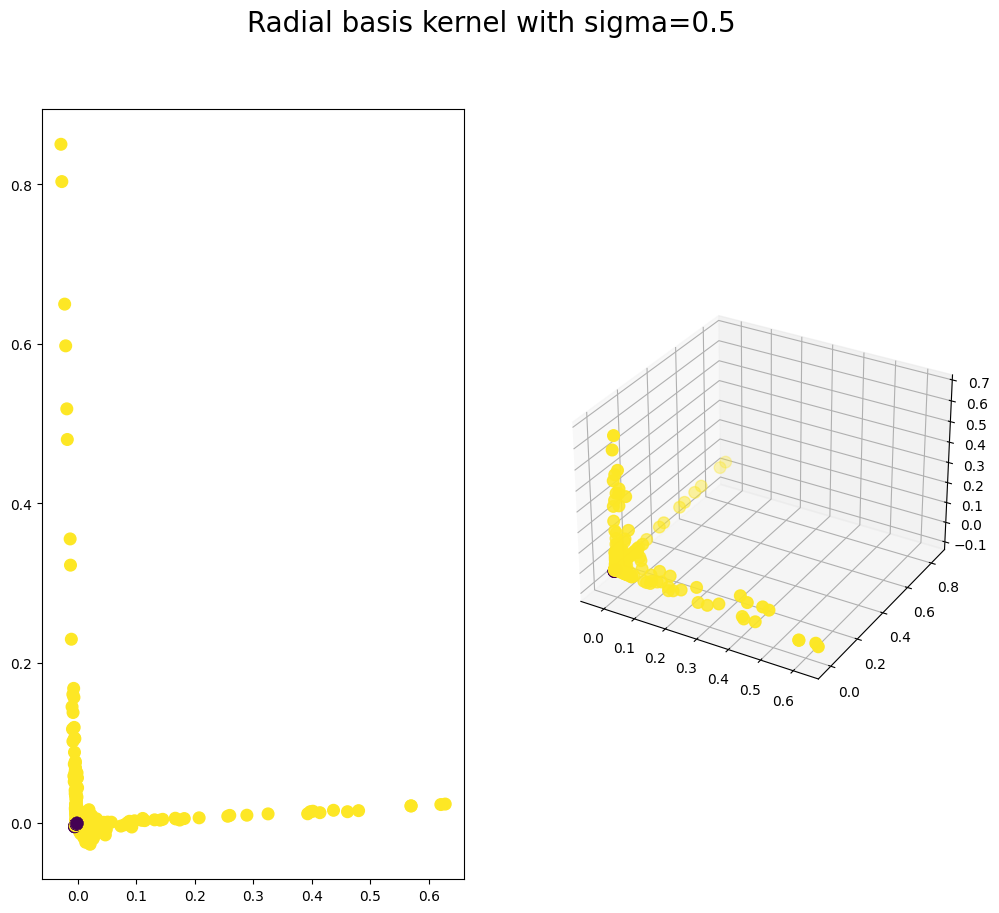

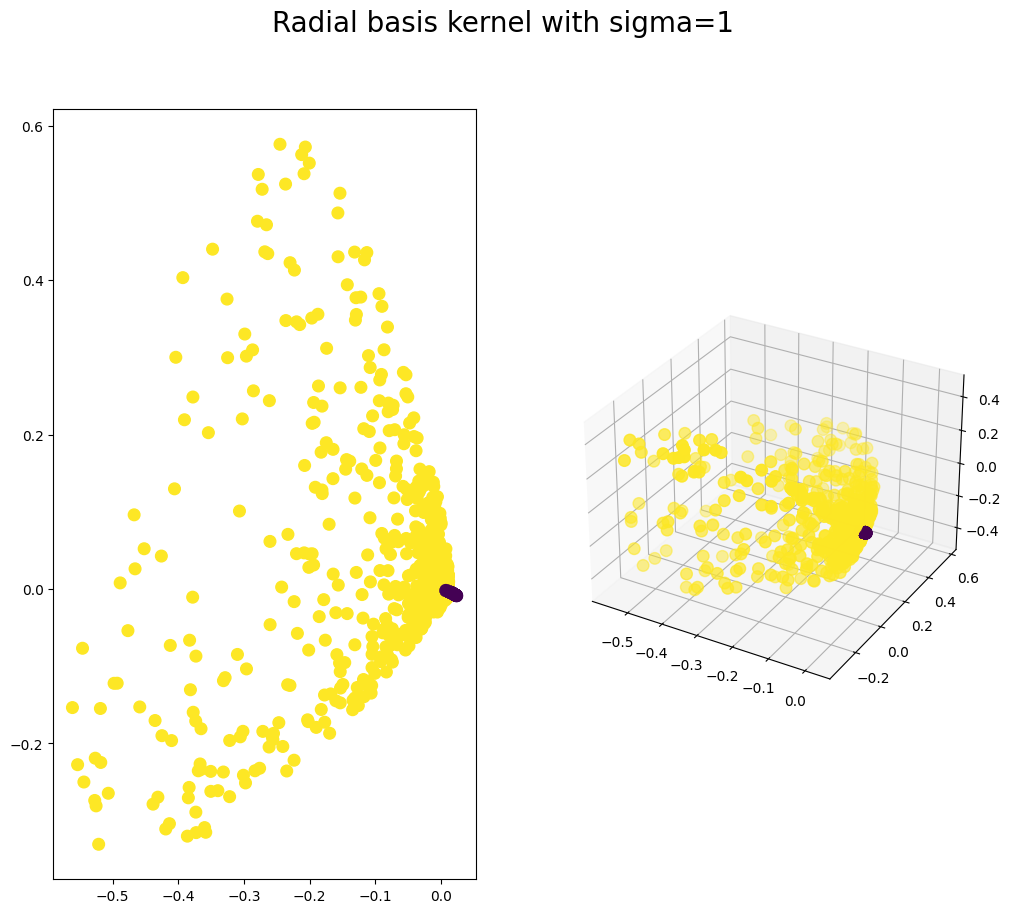

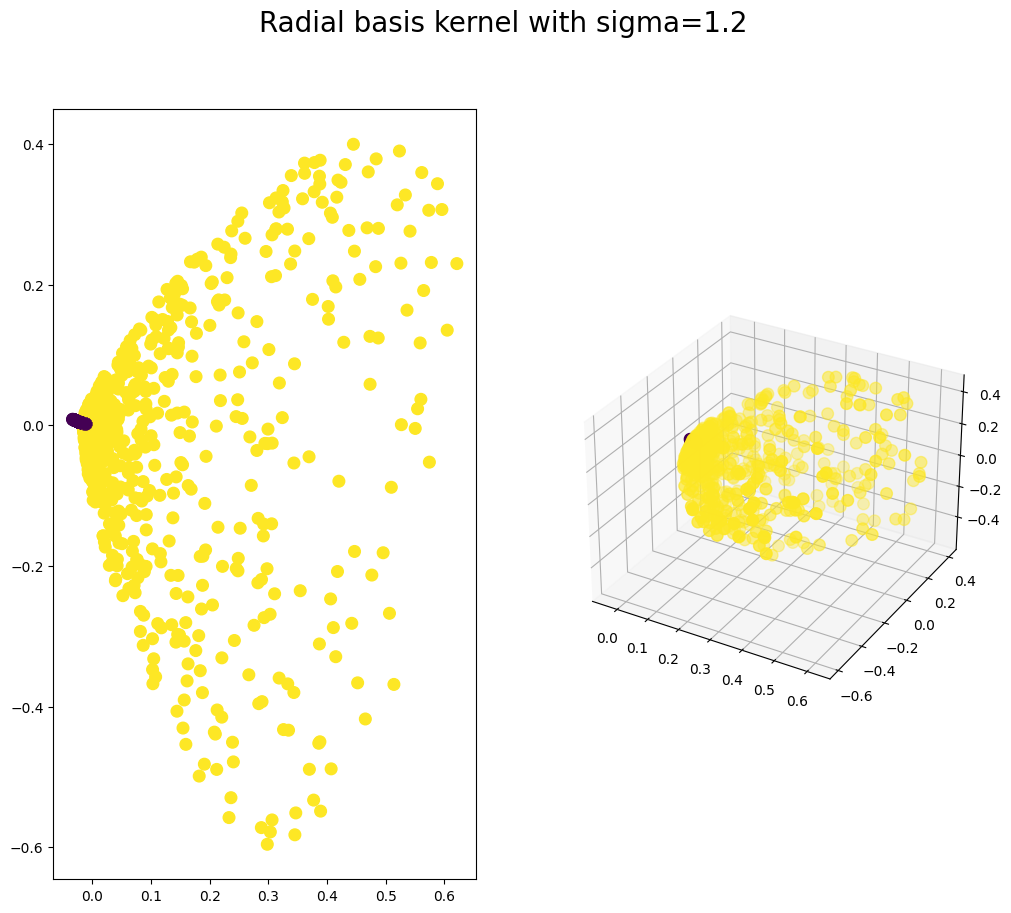

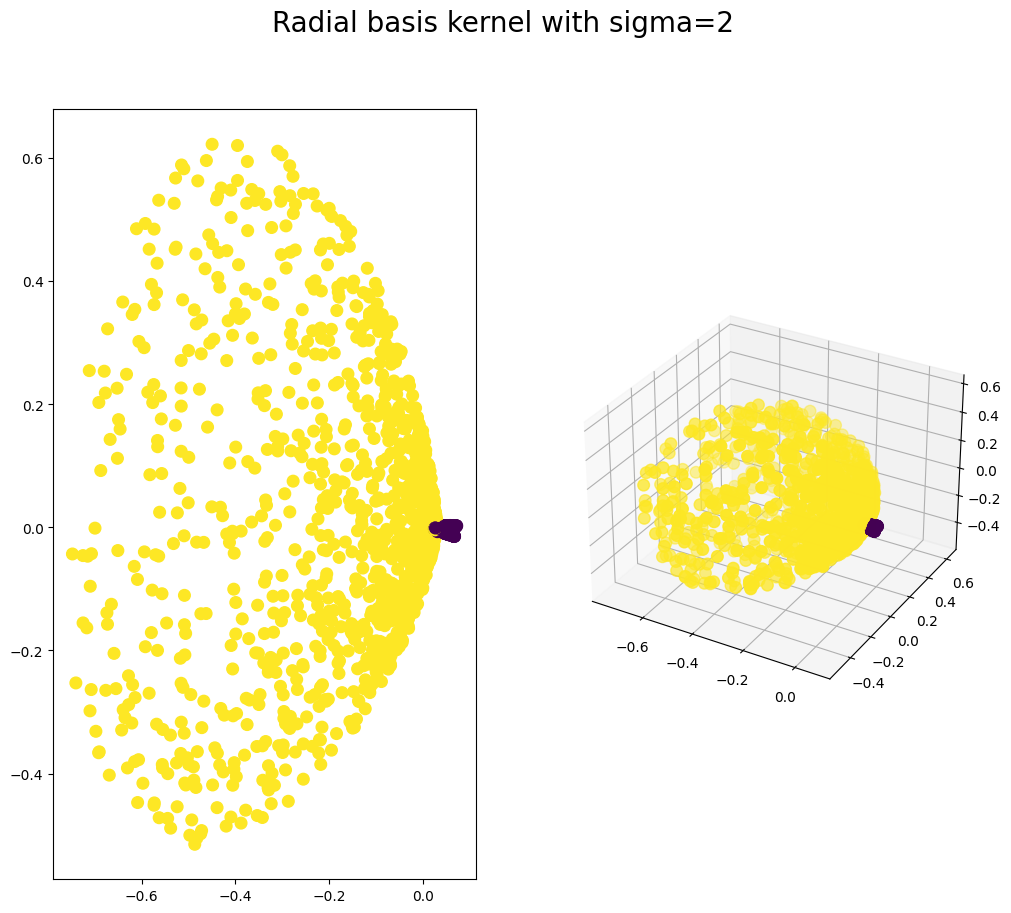

In [13]:
# 30m
for sigma in (0.05, 0.25, 0.5, 1, 1.2, 2):
    plot_data = f.kernel_PCA(new_data, 3, choice = "rbf", sigma = sigma, d = 0)

    fig = plt.figure(figsize=(12,10))
    fig.suptitle(f"Radial basis kernel with sigma={sigma}", fontsize=20)
    ax = fig.add_subplot(1,2,1)
    ax.scatter(plot_data[:,0], plot_data[:,1], c=labels, s=70)
    
    ax = fig.add_subplot(1,2,2, projection='3d')
    ax.scatter3D(plot_data[:,0], plot_data[:,1], plot_data[:,2], c=labels, s=70)
    plt.show()

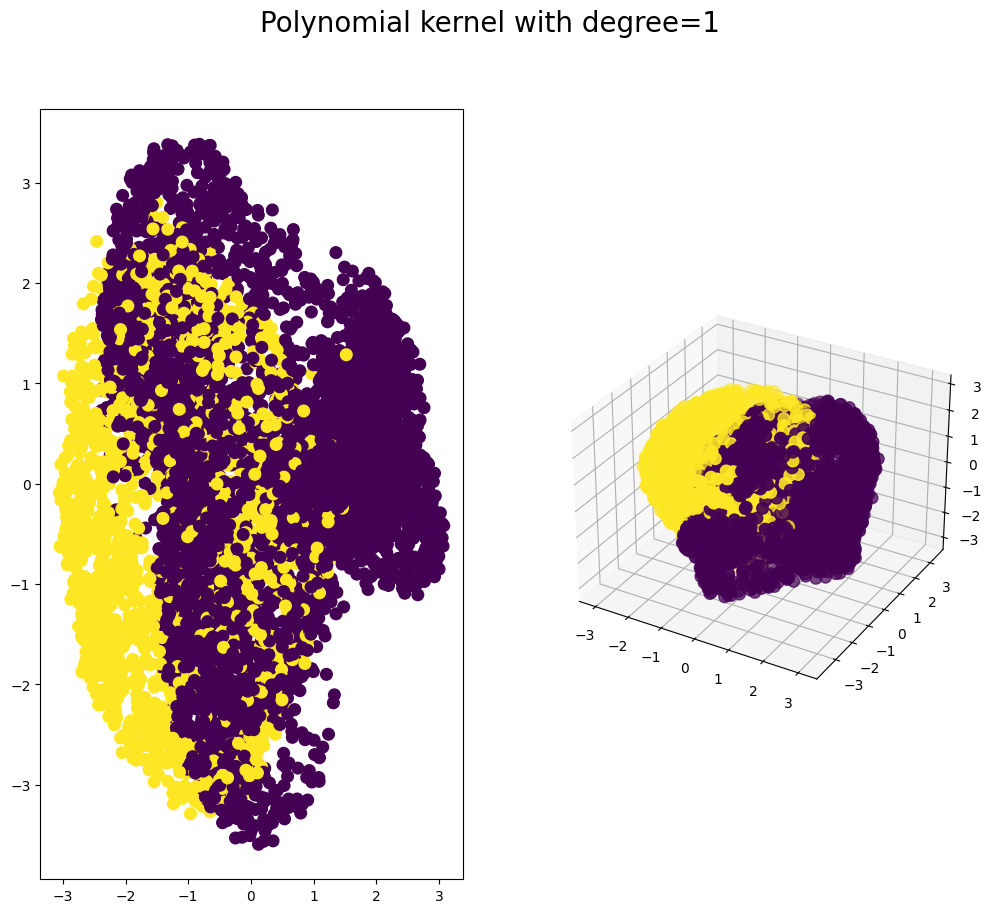

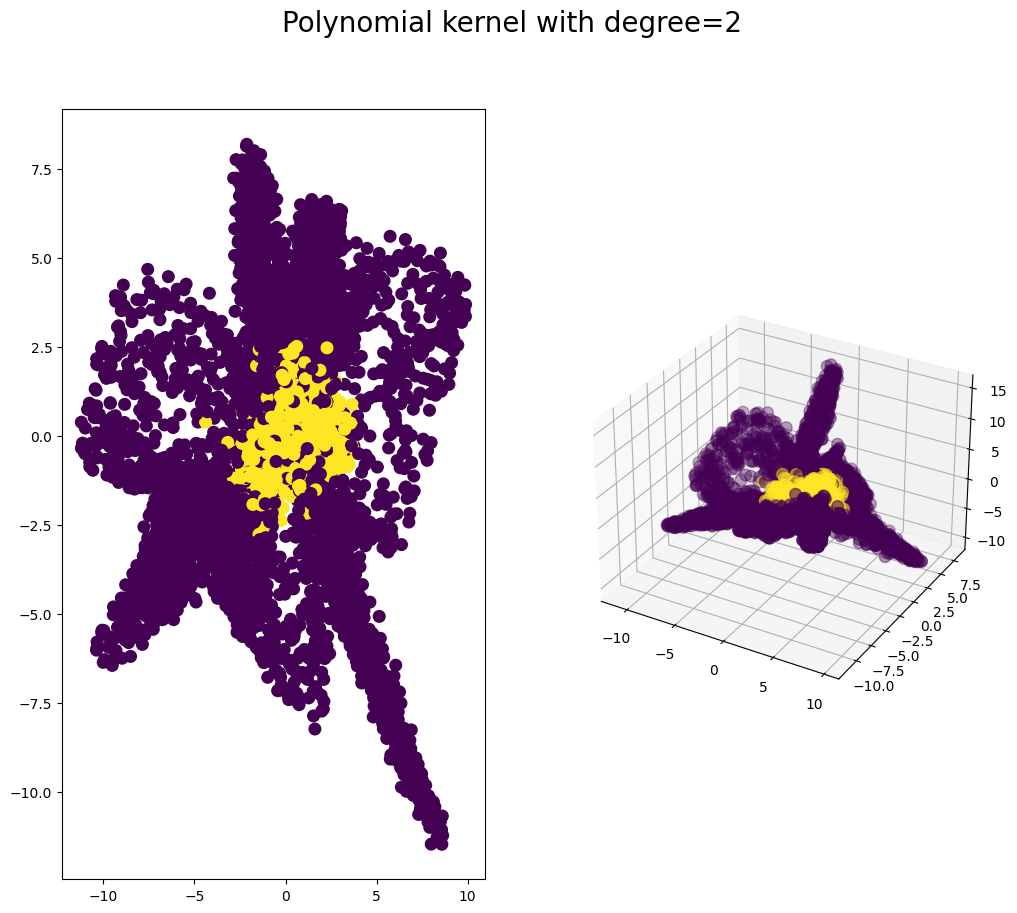

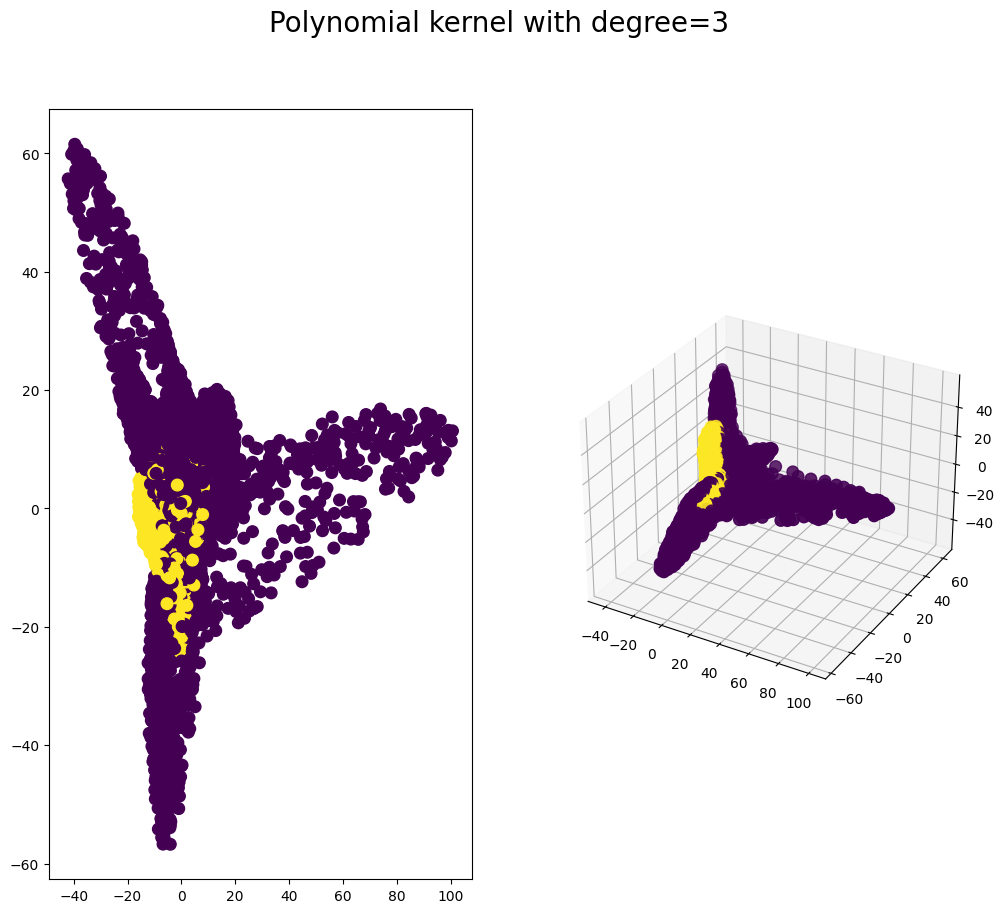

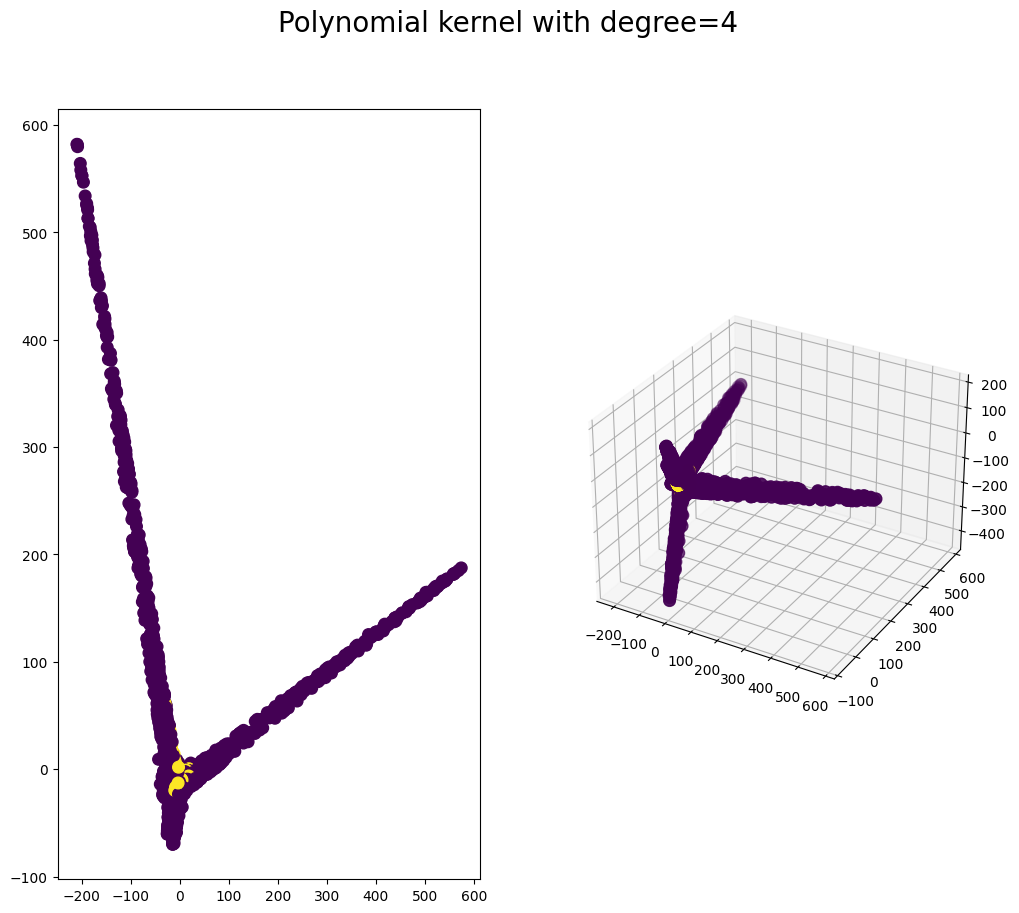

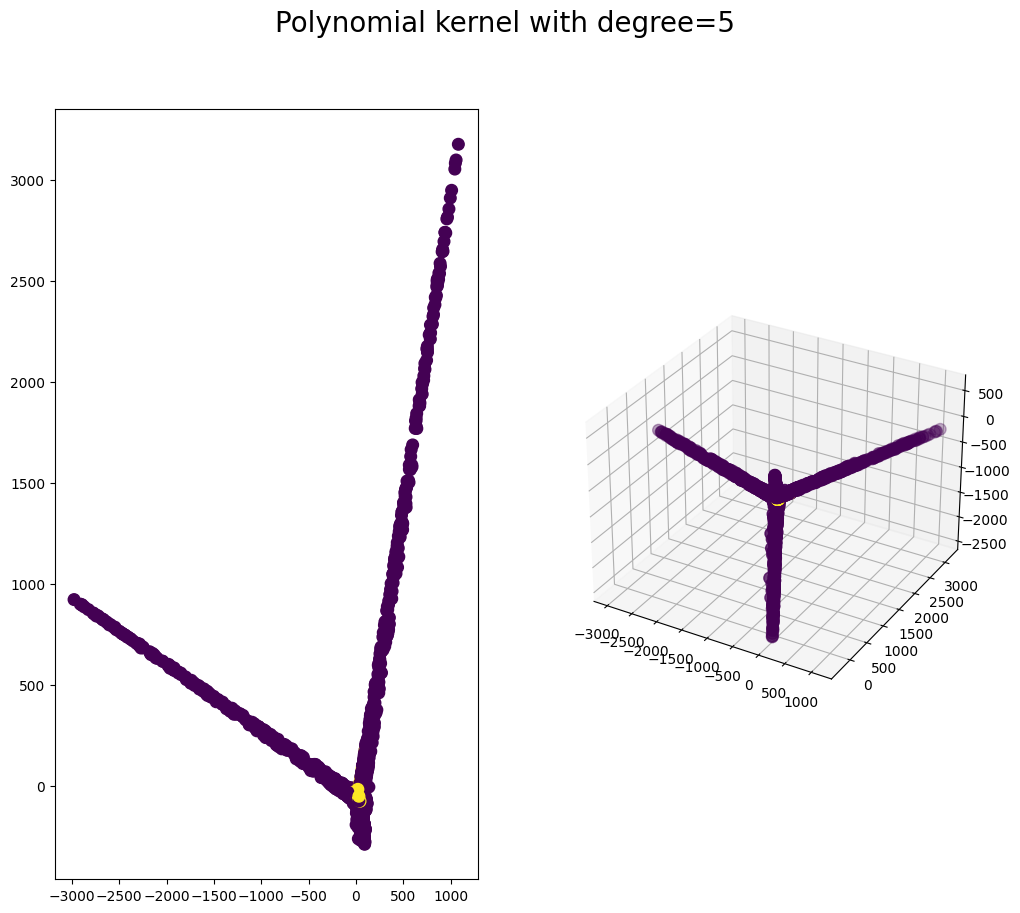

In [14]:
# 13m 18s
for d in (1,2,3,4,5):
    plot_data = f.kernel_PCA(new_data, 3, choice = "polynomial", sigma = 1, d = d)
    
    fig = plt.figure(figsize=(12,10))
    fig.suptitle(f"Polynomial kernel with degree={d}", fontsize=20)
    ax = fig.add_subplot(1,2,1)
    ax.scatter(plot_data[:,0], plot_data[:,1], c=labels, s=70)
    
    ax = fig.add_subplot(1,2,2, projection='3d')
    ax.scatter3D(plot_data[:,0], plot_data[:,1], plot_data[:,2], c=labels, s=70)
    plt.show()